In [45]:
import pandas as pd
from scipy import stats
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\MY FILE\MBAN 6110S-Data Science\assignment 2\experiment_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [5]:
df.describe(include='all')

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,3,3,3,NaN,NaN
top,NaN,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,NaN,343,346,340,NaN,NaN
mean,499.500000,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,288.819436,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,0.000000,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,249.750000,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,499.500000,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,749.250000,53.000000,NaN,NaN,NaN,26.255950,0.124238


In [6]:
df

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
...,...,...,...,...,...,...,...
995,995,39,Location2,Device2,Variant B,17.252030,0.092211
996,996,38,Location3,Device2,Control,30.075898,0.078151
997,997,60,Location2,Device3,Control,31.929223,0.125213
998,998,35,Location2,Device2,Variant B,14.680299,0.095423


In [7]:
# Since 'Unname: 0' column is unnecessary, I remove this column and set the User Id as the index. 
df.drop('Unnamed: 0', axis=1, inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1000 non-null   int64  
 1   Location    1000 non-null   object 
 2   Device      1000 non-null   object 
 3   Variant     1000 non-null   object 
 4   Time Spent  1000 non-null   float64
 5   CTR         1000 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


In [9]:
# by location, result looks similar
df.groupby('Location')[['Time Spent', 'CTR']].mean()

,Time Spent,CTR
Location,,
Location1,22.707286,0.110217
Location2,22.648998,0.108517
Location3,22.787691,0.108708


Using ANOVA test to validate each metric. if they are statistically the same, they should have a high p-value. 

In [10]:
# Checking Location vs CTR
loc_1 = df[df['Location'] == 'Location1']['CTR']
loc_2 = df[df['Location'] == 'Location2']['CTR']
loc_3 = df[df['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

# check the Location vs Time spent 
loc_1 = df[df['Location'] == 'Location1']['Time Spent']
loc_2 = df[df['Location'] == 'Location2']['Time Spent']
loc_3 = df[df['Location'] == 'Location3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.5792245145655729, pvalue=0.5605211716238133)
F_onewayResult(statistic=0.053578839670573676, pvalue=0.9478339402848069)


In [11]:
# Checking Device vs CTR
dev_1 = df[df['Device'] == 'Device1']['CTR']
dev_2 = df[df['Device'] == 'Device2']['CTR']
dev_3 = df[df['Device'] == 'Device3']['CTR']

p_val = stats.f_oneway(dev_1, dev_2, dev_3)
print(p_val)

# Checking Device vs Time Spent
dev_1 = df[df['Device'] == 'Device1']['Time Spent']
dev_2 = df[df['Device'] == 'Device2']['Time Spent']
dev_3 = df[df['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(dev_1, dev_2, dev_3)
print(p_val)

F_onewayResult(statistic=0.7105872492654717, pvalue=0.4916042399968955)
F_onewayResult(statistic=0.26645371811833884, pvalue=0.7661459958744103)


From above statistic test, the P-value are all high, we can conclude the users have similar behaviour. therefore this experiment is reliable and there is no bias.

Now we can analyze and evaluate the experiment results by checking the significance using statistic test, I am using an ANOVA test to compare the three groups(Variant A, Variant B and Control), and also t-test to compare individual variants to the Control and to each other. 


In [12]:
# Check the sample size
df.groupby('Variant').count()

,Age,Location,Device,Time Spent,CTR
Variant,,,,,
Control,340,340,340,340,340
Variant A,330,330,330,330,330
Variant B,330,330,330,330,330


The experiment group are equally assigned. 

In [13]:
# Checking CTR
varA = df[df['Variant'] == 'Variant A']['CTR']
varB = df[df['Variant'] == 'Variant B']['CTR']
control = df[df['Variant'] == 'Control']['CTR']

p_val = stats.f_oneway(varA, varB, control)
print(p_val)

F_onewayResult(statistic=93.58891593622702, pvalue=5.638952705781554e-38)


In [40]:
# Checking Time Spent
varA = df[df['Variant'] == 'Variant A']['Time Spent']
varB = df[df['Variant'] == 'Variant B']['Time Spent']
control = df[df['Variant'] == 'Control']['Time Spent']

p_val = stats.f_oneway(varA, varB, control)
print(p_val)

F_onewayResult(statistic=75.60840947416146, pvalue=2.676826588910432e-31)


Through the ANOVA test, we see both the Time Spent and CTR have significant results. this means that the variants and the control group have completely different behaviours in their Time Spent and CTR based on different variants. 

Now, we are doing an independent t-test for each variant comparing to the Control, and then the variants compared to each other. 

In [35]:
# compare CTR
varA = df[df['Variant'] == 'Variant A']['CTR']
varB = df[df['Variant'] == 'Variant B']['CTR']
control = df[df['Variant'] == 'Control']['CTR']

t_stat, p_val = stats.ttest_ind(varA, control)
t_stat_A, p_val_A = stats.ttest_ind(varB, control)
t_stat_B, p_val_B = stats.ttest_ind(varA, varB)

print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_val}')

print(f'T-Statistic_A: {t_stat_A}')
print(f'P-Value_A: {p_val_A}')

print(f'T-Statistic_B: {t_stat_B}')
print(f'P-Value_B: {p_val_B}')

T-Statistic: 13.829424737499187
P-Value: 1.9602781373243157e-38
T-Statistic_A: 6.4718143491783255
P-Value_A: 1.8743198199982106e-10
T-Statistic_B: 7.08499696316128
P-Value_B: 3.587180487986577e-12


From the result above, we see significant differences between both variants and the control. 

In [34]:
# Compare Time Spent

varA = df[df['Variant'] == 'Variant A']['Time Spent']
varB = df[df['Variant'] == 'Variant B']['Time Spent']
control = df[df['Variant'] == 'Control']['Time Spent']

t_stat, p_val = stats.ttest_ind(varA, control)
t_stat_A, p_val_A = stats.ttest_ind(varB, control)
t_stat_B, p_val_B = stats.ttest_ind(varA, varB)

print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_val}')

print(f'T-Statistic_A: {t_stat_A}')
print(f'P-Value_A: {p_val_A}')

print(f'T-Statistic_B: {t_stat_B}')
print(f'P-Value_B: {p_val_B}')

T-Statistic: 12.142363487472364
P-Value: 8.488565644996449e-31
T-Statistic_A: 8.174237395991806
P-Value_A: 1.496358076285182e-15
T-Statistic_B: 3.6788175394209075
P-Value_B: 0.0002534771014765265


From the result above, we see significant differences between both variants and the control. however, there are no much different between each other. which means both variants yield positive results. 


Now we are looking at which variants perform better

In [18]:
df_result = df.groupby('Variant')[['CTR', 'Time Spent']].mean()
df_result

,CTR,Time Spent
Variant,,
Control,0.098554,20.070781
Variant A,0.120269,24.805547
Variant B,0.108933,23.343783


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, '%')

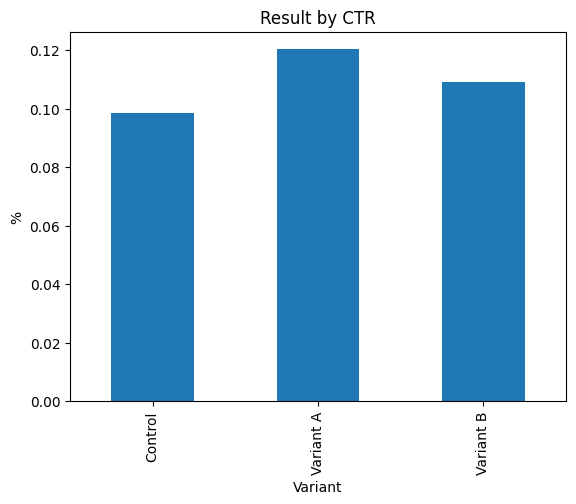

In [30]:
# Visualize the significance
df_result['CTR'].plot(kind='bar')
plt.title('Result by CTR')
plt.ylabel('%')

Text(0, 0.5, 'min')

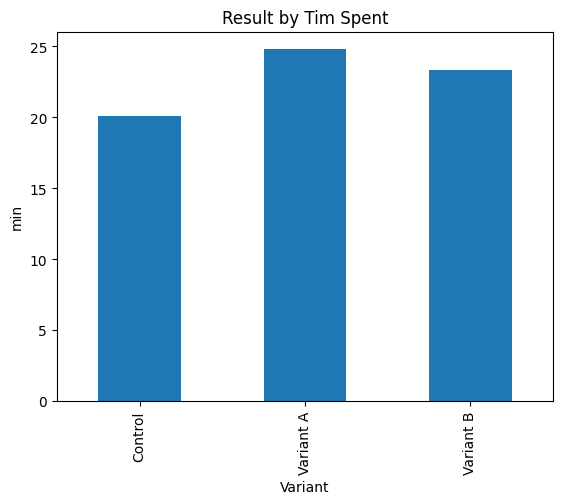

In [29]:
# Visualize the significance
df_result['Time Spent'].plot(kind = 'bar')
plt.title('Result by Tim Spent')
plt.ylabel('min')

Summarize

    Based on our ANOVA and T-test Analysis, both variants have perform positive result. Variant A perform slightly better with 12% CTR and 24.81 min Time Spent. 

    Since the experiment is reliable with similar user bahaviour and randomly seleted same amount of users.  we can trust the experiment. 

Recommendation

    we should recommend to go ahead with the Variant A for further roll-out

Roll-out Plan

    We are planning a three weeks rolling out. 
    
    During the first week, coding the new feathers, tesing and debugging, then we will deploy the new feather. 

    For the second week, we will monitor the feather performance and resolve any possible buggs and tickets. If necessary, we may need to upgrade with newer version 

    For the third week, after the new feather runs smoothly without major issues, we can official close the roll out. 

